In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, make_scorer
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('final_clean.csv')
pd.set_option('display.max_columns', 500)

In [3]:
df.head()

,Unnamed: 0,credit_limit,sep_status,aug_status,july_status,june_status,may_status,april_status,balance_sep,balance_aug,balance_july,balance_june,balance_may,balance_april,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april,default payment next month,male,female,grad_school,undergrad,high_school,single,married,divorced,20s,30s,40s,50s,60s,70s
0,0,20000.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,0,1,0,0,1,0,0,0,0,0
1,1,120000.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,0,1,0,1,0,0,1,0,1,0,0,0,0,0
2,2,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
3,3,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,0,1,0,1,0,1,0,0,0,1,0,0,0,0
4,4,50000.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0,1,0,0,1,0,1,0,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
Unnamed: 0                    30000 non-null int64
credit_limit                  30000 non-null float64
sep_status                    30000 non-null float64
aug_status                    30000 non-null float64
july_status                   30000 non-null float64
june_status                   30000 non-null float64
may_status                    30000 non-null float64
april_status                  30000 non-null float64
balance_sep                   30000 non-null float64
balance_aug                   30000 non-null float64
balance_july                  30000 non-null float64
balance_june                  30000 non-null float64
balance_may                   30000 non-null float64
balance_april                 30000 non-null float64
amt_paid_sep                  30000 non-null float64
amt_paid_aug                  30000 non-null float64
amt_paid_july                 30000 non-null 

In [5]:
df.describe()

,Unnamed: 0,credit_limit,sep_status,aug_status,july_status,june_status,may_status,april_status,balance_sep,balance_aug,balance_july,balance_june,balance_may,balance_april,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april,default payment next month,male,female,grad_school,undergrad,high_school,single,married,divorced,20s,30s,40s,50s,60s,70s
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,14999.500000,167484.322667,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.396267,0.603733,0.352833,0.467667,0.163900,0.455300,0.532133,0.010767,0.320600,0.374600,0.215467,0.078033,0.010467,0.000833
std,8660.398374,129747.661567,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.489129,0.489129,0.477859,0.498962,0.370191,0.498006,0.498975,0.103204,0.466715,0.484028,0.411153,0.268229,0.101772,0.028856
min,0.000000,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7499.750000,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14999.500000,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22499.250000,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,29999.000000,1000000.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(30000, 35)

In [7]:
del df['Unnamed: 0']

Split and label the data, then train our classifiers

In [8]:
y = df['default payment next month']
X = df.drop('default payment next month', axis=1)

In [9]:
X.head()

,credit_limit,sep_status,aug_status,july_status,june_status,may_status,april_status,balance_sep,balance_aug,balance_july,balance_june,balance_may,balance_april,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april,male,female,grad_school,undergrad,high_school,single,married,divorced,20s,30s,40s,50s,60s,70s
0,20000.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0,1,0,1,0,1,0,0,1,0,0,0,0,0
1,120000.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0,1,0,1,0,0,1,0,1,0,0,0,0,0
2,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
3,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,1,0,1,0,0,0,1,0,0,0,0
4,50000.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1,0,0,1,0,1,0,0,0,0,0,1,0,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

# First Model Attempt: Logistic Regression

In [11]:
logreg = LogisticRegression(fit_intercept = False, C=1e16, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, solver='liblinear')

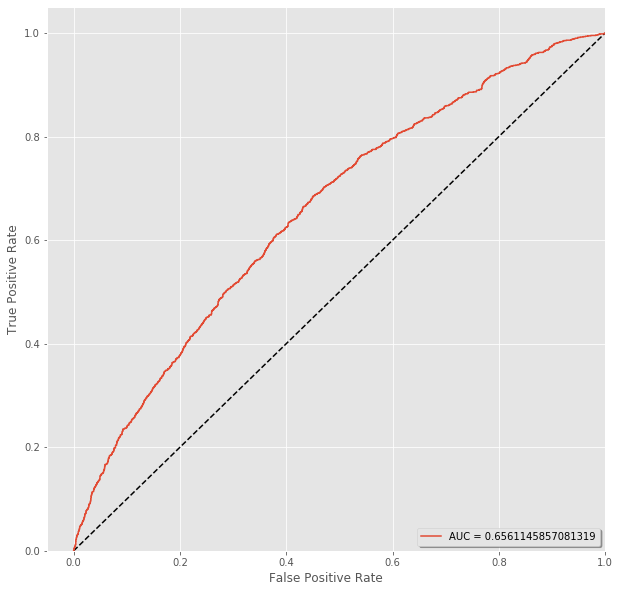

In [12]:
# overall accuracy
acc = logreg.score(X_test,y_test)

# get roc/auc info
y_score = logreg.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [13]:
# Confusion matrix and classification report
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4687    0]
 [1313    0]]
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88      4687
         1.0       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



### Our model has a major classification issue.
- It does not predict any 1s (Default on Credit) and seems useless.

## To verify uselessness, and to create a baseline measurement from which to measure all future models, we will calculate the null accuracy

## What is the null accuracy?
- Null Accuracy: Accuracy that could be achieved by always predicting the most frequent class
- As we saw in our earlier EDA, there are far more folks who will pay next month than default. Might this have an effect?

In [14]:
# examine class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0.0    4687
1.0    1313
Name: default payment next month, dtype: int64

In [15]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1-y_test.mean())

0.7811666666666667

The majority class is 0 (folks who pay), if our classifier guesses the most frequent class (in our case, 0 (folks who pay)) it will be correct 78% of the time. This must be considered when we examine further classifiers' accuracy. It is also why I will put a focus on F1-Score, recall, and AUC.

- F1 is a combination of recall and precision. It harmonizes the two. 
- I will still focus on acquiring a higher recall because my clients will be more okay with a model that gives more false positives than false negatives.
    - In our case, a false positive means someone is rejected for credit. An annoyance for the customer is our worst case scenario.
    - A false negative means we give credit to someone who cannot pay the loan back. Decisions to lend to people who are likely to default on their next credit payment were part of the backbone of the 2008 financial collapse.
- The AUC is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve 
    - The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance.
        - ROC does not depend on class distribution so it is helpful with cases of class imbalance.
        - We seem to have class imbalance in our dataset as there are far more people who will pay next month than who will default next month.

## Back to our above Logistic Regression

For our above regression, lets adjust the classification threshold to continue.

In [16]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.55679487, 0.44320513],
       [0.75488697, 0.24511303],
       [0.58911327, 0.41088673],
       [0.71579731, 0.28420269],
       [0.71278437, 0.28721563],
       [0.6381302 , 0.3618698 ],
       [0.66433684, 0.33566316],
       [0.68106267, 0.31893733],
       [0.89053846, 0.10946154],
       [0.76067397, 0.23932603]])

In [18]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.44320513, 0.24511303, 0.41088673, 0.28420269, 0.28721563,
       0.3618698 , 0.33566316, 0.31893733, 0.10946154, 0.23932603])

In [19]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

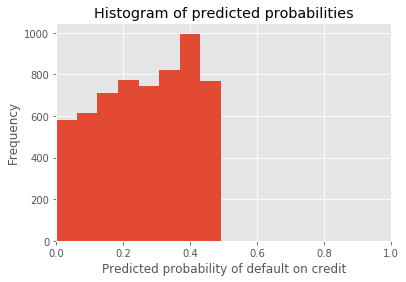

In [20]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of default on credit')
plt.ylabel('Frequency')

### **Decrease the threshold** for predicting default on payment in order to **increase the sensitivity** of the classifier

In [21]:
# predict a default if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [22]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.44320513, 0.24511303, 0.41088673, 0.28420269, 0.28721563,
       0.3618698 , 0.33566316, 0.31893733, 0.10946154, 0.23932603])

In [23]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 1., 0., 0., 1., 1., 1., 0., 0.])

In [24]:
# previous confusion matrix (default threshold of 0.5)
print(confusion_matrix(y_test, y_pred))

[[4687    0]
 [1313    0]]


In [25]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[2826 1861]
 [ 497  816]]


In [26]:
# sensitivity has increased (used to be 0.0)
print(815 / float(815 + 498))

0.6207159177456207


In [27]:
# specificity has decreased (used to be 1.0)
print(2826 / float(2826 + 1861))

0.6029443140601665


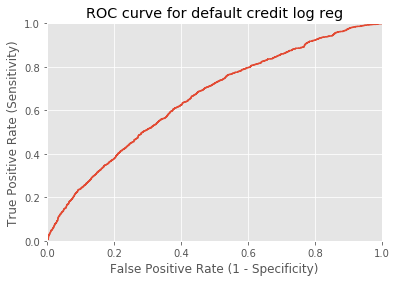

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for default credit log reg')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [29]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [30]:
evaluate_threshold(0.5)

Sensitivity: 0.0
Specificity: 1.0


In [31]:
evaluate_threshold(0.3)

Sensitivity: 0.6214775323686215
Specificity: 0.6029443140601665


In [32]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.6561145857081319


In [33]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.6544913337644844

In [34]:
# Classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.85      0.60      0.71      4687
         1.0       0.30      0.62      0.41      1313

    accuracy                           0.61      6000
   macro avg       0.58      0.61      0.56      6000
weighted avg       0.73      0.61      0.64      6000



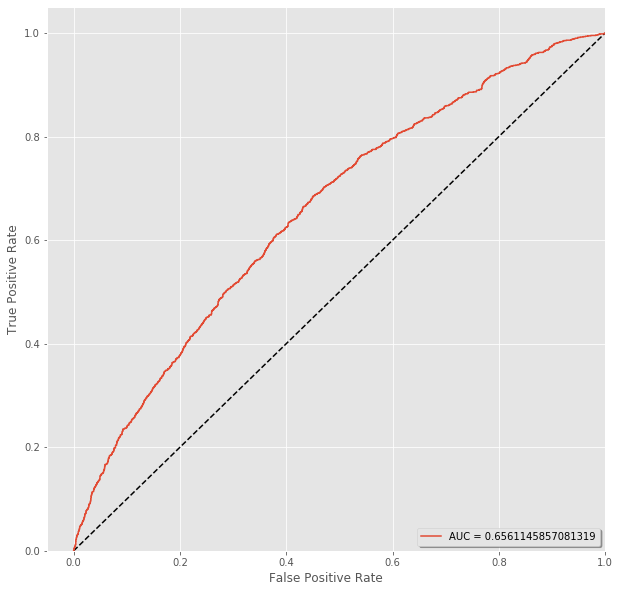

In [35]:
# overall accuracy
acc = logreg.score(X_test,y_test)

# get roc/auc info
y_score = logreg.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

## Final Measurements of Note on Logistic Regression Model:
- F1 Score: 0.41
- Much higher recall than precision (0.62 vs. 0.3)
- AUC of 0.656

# Decision Tree Model

In [36]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## Initially Untuned

In [37]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
print(metrics.roc_auc_score(y_test, y_pred))

0.6074637095588241


In [38]:
# Our model is already 20% higher than a random guess. This is good! Trending in the right direction

In [39]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3806  881]
 [ 784  529]]
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      4687
         1.0       0.38      0.40      0.39      1313

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.72      0.73      6000



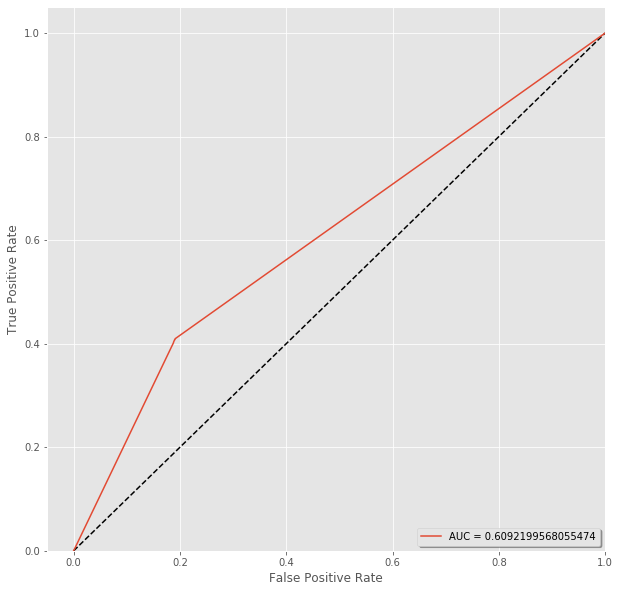

In [40]:
# overall accuracy
acc = dt.score(X_test,y_test)

# get roc/auc info
y_score = dt.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

## Initial Notes
- f1-score of 0.39 --> Not ideal at all.
- AUC of 0.609
- Recall and precision are about the same. Both low.
- Let's Tune!

## Tune the Decision Tree Classifier's Hyperparameters

### Let's examine max tree depth and see the results
- Create an array for max_depth vals ranging from 1 to 32 (we want a big range of possibilities here)
- Create a loop to train the classifier for each depth value (32 runs for 32 possibilities)
- Calculate the training and test AUC for each run
- Graph will reveal optimum MTD 

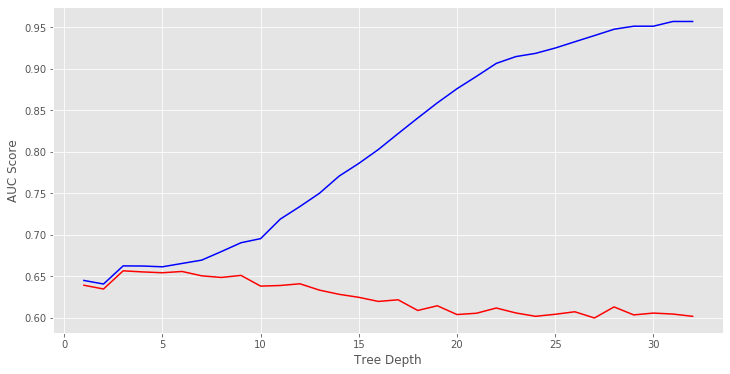

In [41]:
max_depths = np.linspace(1,32,32,endpoint=True)
# As review, linspace returns evenly spaced numbers over a specified interval.
train_results=[]
test_results=[]
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # add auc score to the previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # add score to previous test results
    test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC Score')
plt.xlabel('Tree Depth')
plt.legend
plt.show()

### Notes:
- After depth of around 11, training error massively decreases (sign of overfitting)
- After depth of 11, testing error increases. 
- Max depth appropriate seems to be around 6 if we work with a single decision tree for the entire dataframe

## Minimum Sample Split Analysis
- Create an array for min. sample split values ranging from 0.1 - 1.0
- In a loop, train the classifier for each min_samples_splits value (10 runs)
- Calculate the AUCs (both train & test)
- Plot to reveal optimum value for MSS

### Note on Min Sample Split:
min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. 

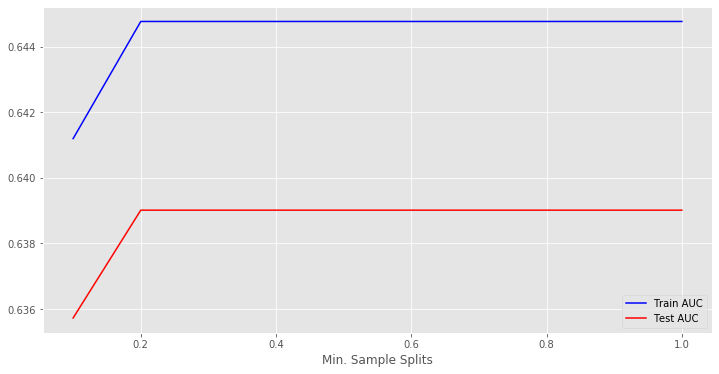

In [42]:
min_samples_splits = np.linspace(0.1,1.0,10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier (criterion = 'entropy', min_samples_split = min_samples_split, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label = 'Train AUC')
plt.plot(min_samples_splits, test_results, 'r',label = 'Test AUC')
plt.xlabel('Min. Sample Splits')
plt.legend()
plt.show()

In [43]:
# Once this split hit 0.2 there was no increase in learning. 

## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree 

- Create an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

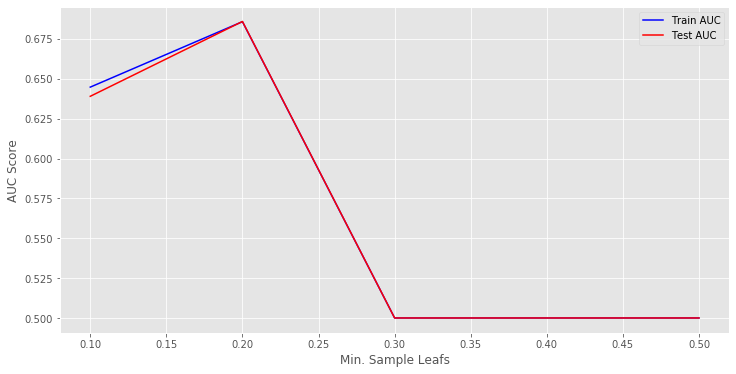

In [44]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs=np.linspace(0.1,0.5,5, endpoint = True)
train_results=[]
test_results=[]
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = min_samples_leaf, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve (y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC Score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

### Distinct drop in accuracy with both training and testing after 0.2

## Maximum Features

Now check for the best `max_features` parameter value for our decision tree 

- Create an array for `max_features` values ranging from 1 - 12 (1 feature vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 

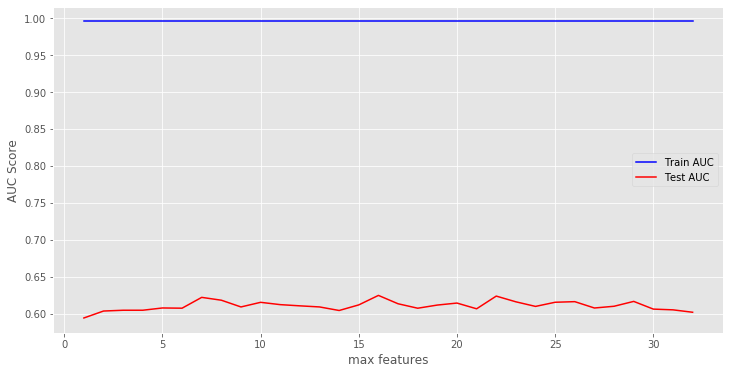

In [46]:
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion = 'entropy', max_features = max_feature, random_state=42)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label = 'Train AUC')
plt.plot(max_features, test_results, 'r', label = 'Test AUC')
plt.ylabel('AUC Score')
plt.xlabel('max features')
plt.legend()
plt.show()

### We seem to have the best shot with a maximum of around 22 features.

## Retrain the Decision Tree Model with the values we have found.

## The Goal: Improve Predictive Performance
- This is all preliminary as, of course, we will be using Random Forests later but it will be worth considering our final results here.
- Time to compare AUCs after using the values we determined in our above tuning experiences!

In [47]:
dt2 = DecisionTreeClassifier(criterion='entropy',
                           max_features=22,
                           max_depth = 11,
                           min_samples_split = 0.2,
                           min_samples_leaf = 0.2,
                           random_state = 42)

dt2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features=22,
                       min_samples_leaf=0.2, min_samples_split=0.2,
                       random_state=42)

### Let's check the accuracy and create a confusion matrix

In [48]:
y_pred = dt2.predict(X_test)
# Calculate accuracy 
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy is: {0}'.format(acc))
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test,y_pred,rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is: 77.91666666666667

Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,3992,695,4687
1.0,630,683,1313
All,4622,1378,6000


In [49]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3992  695]
 [ 630  683]]
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      4687
         1.0       0.50      0.52      0.51      1313

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.78      0.78      0.78      6000



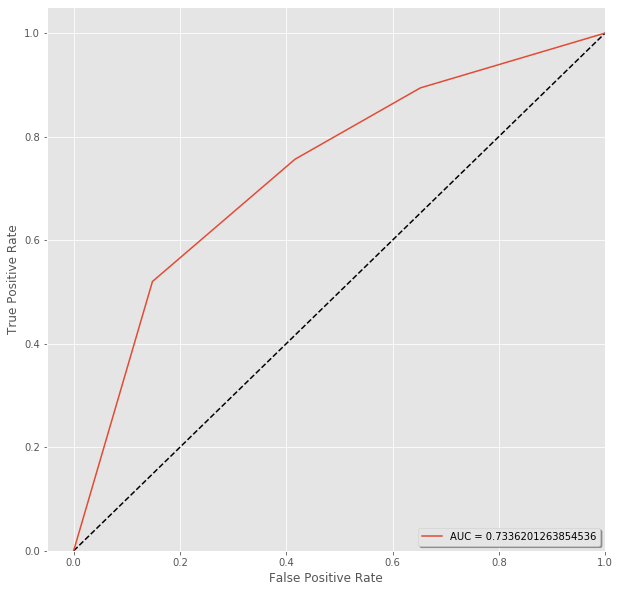

In [50]:
# overall accuracy
acc = dt2.score(X_test,y_test)

# get roc/auc info
y_score = dt2.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

## Results of Decision Tree Classifier post-tuning: 
- New roc_auc: 0.733
- Original roc_auc: 0.609
- Precision and Recall are nearly even at 0.50 and 0.52 respectively.
- F1 is at 0.51
- Doing pretty well! Look forward to seeing how/if bagging and random forest will improve things. 
- Accuracy is 78% which is nice but we want to make sure we are not running into false negative errors (where the model says you can pay next month when, in fact, you cannot).
    - We want to have a model that does not cost the bank money! 

### Let's create a visual tree of our un-tuned and tuned classifier before we go!

In [52]:
# Create DOT data
#dot_data = export_graphviz(dt, out_file=None, 
#                           feature_names=X_train.columns,  
#                           class_names=np.unique(y).astype('str'), 
#                           filled=True, rounded=True, special_characters=True)

# Draw graph
#graph = graph_from_dot_data(dot_data)  

# Show graph
# Image(graph.create_png())

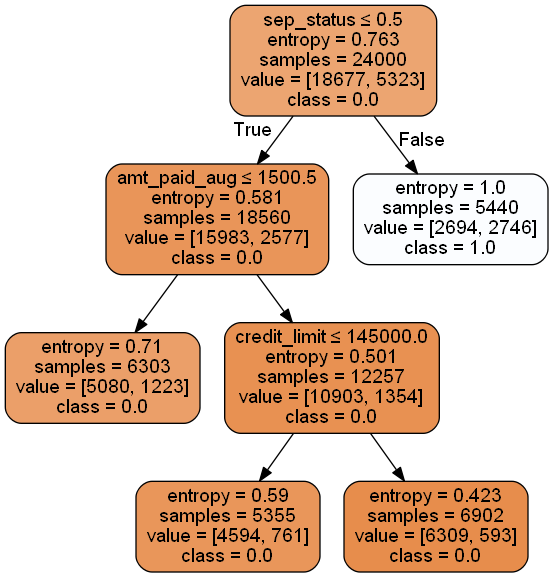

In [53]:
# Create DOT data
dot_data = export_graphviz(dt2, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [54]:
# Let's make the above data readable by putting it in a chart:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

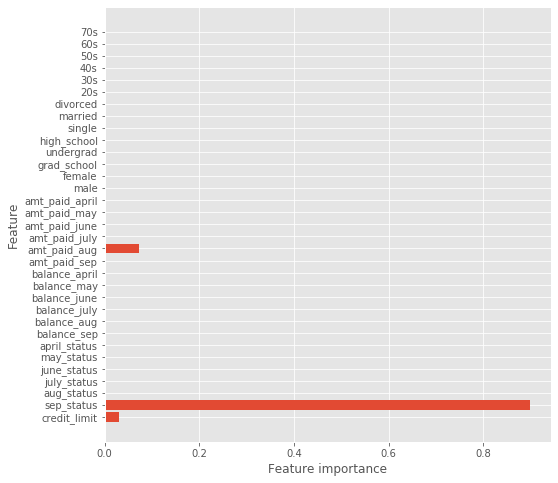

In [55]:
plot_feature_importances(dt2)

# K-Nearest-Neighbors

### Before we finish our KNN Model we must Normalize our Data after the split to prevent leakage

In [56]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.fit_transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,credit_limit,sep_status,aug_status,july_status,june_status,may_status,april_status,balance_sep,balance_aug,balance_july,balance_june,balance_may,balance_april,amt_paid_sep,amt_paid_aug,amt_paid_july,amt_paid_june,amt_paid_may,amt_paid_april,male,female,grad_school,undergrad,high_school,single,married,divorced,20s,30s,40s,50s,60s,70s
0,-0.672359,0.014796,0.109694,0.141120,0.188700,0.234055,0.250571,0.329670,0.400979,0.455707,0.479450,-0.008367,0.011698,-0.126892,-0.039537,-0.173567,-0.224654,-0.216008,-0.245240,-0.808159,0.808159,-0.739251,1.070299,-0.44446,-0.915398,0.939572,-0.105866,1.455926,-0.770608,-0.527860,-0.289677,-0.10363,-0.03029
1,-1.057768,0.014796,0.109694,0.141120,0.188700,0.234055,0.250571,-0.295445,-0.273649,-0.254132,-0.277182,-0.299323,-0.653898,-0.038915,-0.194250,-0.241596,-0.240785,-0.308523,-0.295532,1.237381,-1.237381,-0.739251,1.070299,-0.44446,-0.915398,0.939572,-0.105866,1.455926,-0.770608,-0.527860,-0.289677,-0.10363,-0.03029
2,0.098459,0.014796,0.109694,-0.698046,-0.667404,-0.648616,-0.617206,-0.408879,-0.689698,-0.662788,-0.671371,-0.548685,-0.479473,-0.331937,-0.210475,-0.288246,0.122676,0.353487,-0.285107,-0.808159,0.808159,-0.739251,-0.934319,-0.44446,1.092421,-1.064314,-0.105866,-0.686848,-0.770608,1.894442,-0.289677,-0.10363,-0.03029
3,-0.826523,0.014796,0.109694,0.141120,0.188700,0.234055,0.250571,0.107788,0.060915,-0.118736,-0.052671,-0.008763,0.006350,-0.213815,-0.167236,-0.178610,-0.207358,-0.186877,-0.180973,1.237381,-1.237381,1.352721,-0.934319,-0.44446,-0.915398,0.939572,-0.105866,1.455926,-0.770608,-0.527860,-0.289677,-0.10363,-0.03029
4,-0.286950,0.014796,0.109694,0.141120,0.188700,0.234055,0.250571,0.826432,0.894408,0.981423,1.167654,1.330983,1.436224,-0.091947,-0.072522,-0.014157,0.007308,0.011598,0.317359,-0.808159,0.808159,-0.739251,1.070299,-0.44446,-0.915398,0.939572,-0.105866,1.455926,-0.770608,-0.527860,-0.289677,-0.10363,-0.03029


### Initially we will have an un-tuned KNN Model. 

In [57]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [58]:
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))

[[4328  359]
 [ 866  447]]
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.88      4687
         1.0       0.55      0.34      0.42      1313

    accuracy                           0.80      6000
   macro avg       0.69      0.63      0.65      6000
weighted avg       0.77      0.80      0.78      6000



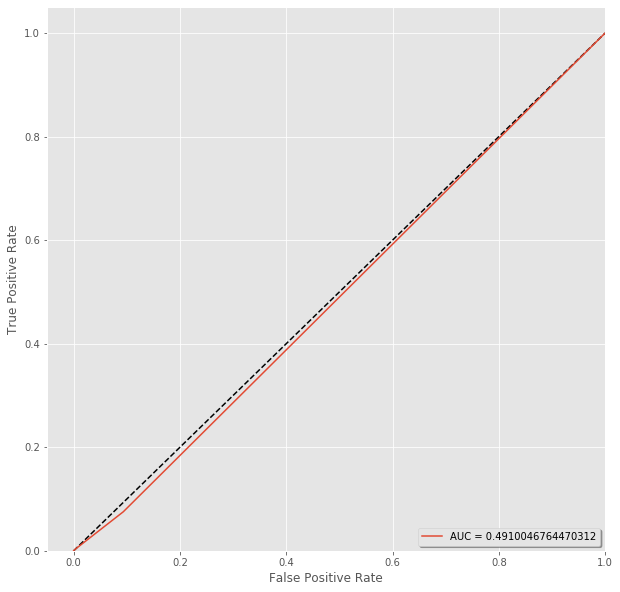

In [59]:
# overall accuracy
acc = clf.score(X_test,y_test)

# get roc/auc info
y_score = clf.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

## Notes on KNN:
- Not great results.
- Very poor AUC of 0.491
- F1 = 0.42
- Very low recall and moderate precision (0.34 and 0.55 respectively)

## One major question we have: How many neighbors should we use?
- Let's build a function and find out.

In [60]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range (min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score (y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    print ("Best value for k: {}".format(best_k))
    print ("F1-Score: {}".format(best_score))

In [61]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best value for k: 5
F1-Score: 0.42189712128362433


In [62]:
# Instantiate KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier
clf2.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf2.predict(scaled_data_test)

In [63]:
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))

[[4328  359]
 [ 866  447]]
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.88      4687
         1.0       0.55      0.34      0.42      1313

    accuracy                           0.80      6000
   macro avg       0.69      0.63      0.65      6000
weighted avg       0.77      0.80      0.78      6000



0.419 is not a good f-1 score. This is not a good model.

## Notes on updated KNN:
- The f1 is 0.42
- The recall and precision are around the same as before
- Time to move on.

# Revisiting Decision Trees with Random Forests

## Before the random forest, create another standard decision tree

In [64]:
dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=6)
dt3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [65]:
# Before moving forward, let's check feature importance. 
dt3.feature_importances_

array([0.03697406, 0.58931045, 0.15068656, 0.01261583, 0.00939211,
       0.02255497, 0.00623552, 0.03299945, 0.00791129, 0.00863251,
       0.00176382, 0.00277948, 0.00249343, 0.00715775, 0.01243079,
       0.07158353, 0.00672071, 0.00413981, 0.00555062, 0.        ,
       0.        , 0.002805  , 0.        , 0.00220224, 0.00306007,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

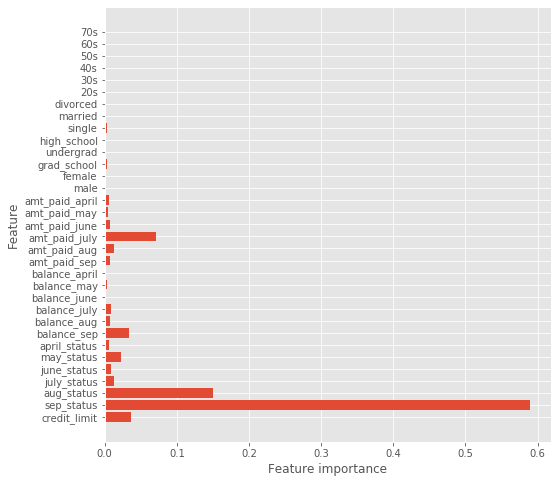

In [66]:
plot_feature_importances(dt3)

### The payment status in September is of most importance followed by one's status in August. 
- Only non-status-related feature of import seems to be the amount one paid in July.

### Now, let's see how well our DT model performs on the test data

In [67]:
# Test set predictions
pred = dt3.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4452  235]
 [ 839  474]]
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4687
         1.0       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



Now, let's check our model's accuracy below:

In [68]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 82.1%


The F1 is now at 0.47. Much better than the above KNN Model! 

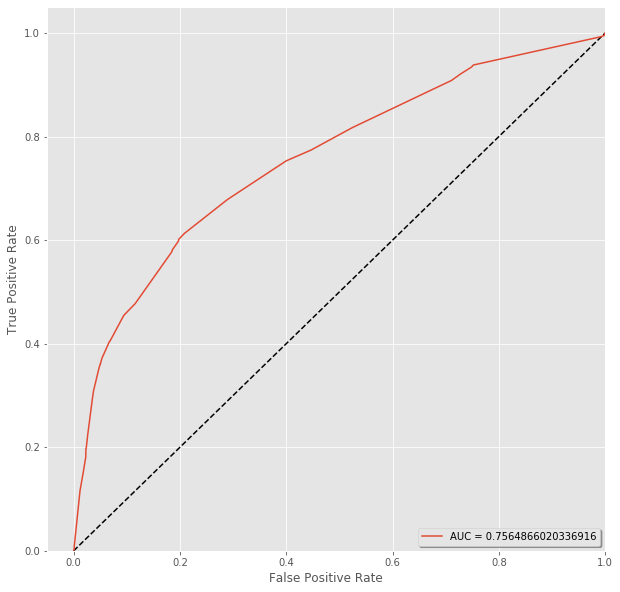

In [69]:
# overall accuracy
acc = dt3.score(X_test,y_test)

# get roc/auc info
y_score = dt3.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

### AUC of non-optimized entropy decision tree with max depth of 6: 0.756

## Before we work with Random Forests, we will partake in some Bagging
- Define Bagging

In [70]:
# Instantiate a BaggingClassifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5), 
                                 n_estimators=20)

In [71]:
# Fit to the training data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  n_estimators=20)

In [72]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

0.826125

This is nice and all, but how it performs on the test data is most important! Let's check that out.

In [73]:
# Test accuracy score
bagged_tree.score(X_test, y_test)

0.8216666666666667

EXCELLENT! The similarity of accuracies exhibit a lack of overfitting!

In [74]:
# Test set predictions
pred = bagged_tree.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4476  211]
 [ 859  454]]
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4687
         1.0       0.68      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



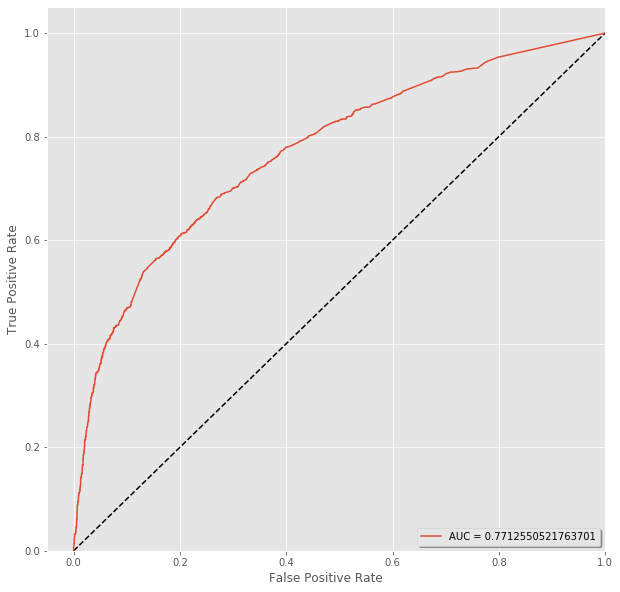

In [75]:
# overall accuracy
acc = bagged_tree.score(X_test,y_test)

# get roc/auc info
y_score = bagged_tree.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

- F1: 0.46
- Precision: 0.68
- Recall: 0.35
- AUC: 0.77

## Now for some Random Forests

In [76]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=6)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [77]:
# Training accuracy score
forest.score(X_train, y_train)

0.8240833333333333

In [78]:
# Test accuracy score
forest.score(X_test, y_test)

0.8171666666666667

Slightly lower than Bagged Trees but still fine.

### Let's check out the feature importances in our forest:

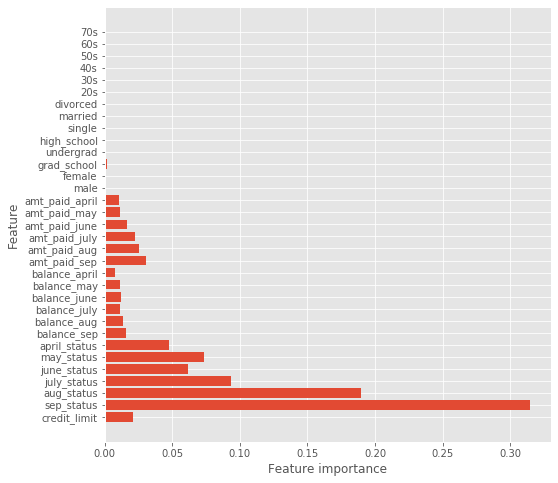

In [79]:
plot_feature_importances(forest)

## Analysis of Feature Importances from Random Forest:
- Similar to earlier basic decision tree analysis--One's payment status in September is still paramount.
    - However this reveals that the payment status in August is more important than we initially realized.
    - In general, one's payment status in the past 4-5 months is more important than any other feature here.

In [80]:
# Test set predictions for forest:
pred = forest.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4500  187]
 [ 910  403]]
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      4687
         1.0       0.68      0.31      0.42      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.63      0.66      6000
weighted avg       0.80      0.82      0.79      6000



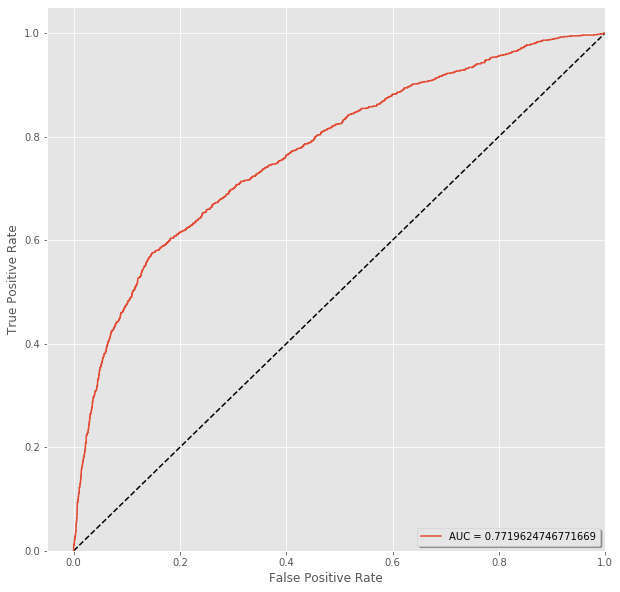

In [81]:
# overall accuracy
acc = forest.score(X_test,y_test)

# get roc/auc info
y_score = forest.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

### Non-Optimized Random Forest F1 and AUC
- F1: 0.43
- AUC: 0.772

# Next Up: GridSearchCV

## We begin with a Decision Tree

In [82]:
dt_clf = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3) 
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 72.38%


In [83]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [84]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [85]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 84.14%
Mean Test Score: 82.12%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [86]:
# Very encouraging to see the Training and Test scores so similar!

### Let's create a Decision Tree with these parameters.

In [87]:
tree_clf2 = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf = 1,
                                  min_samples_split = 2)
tree_clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [88]:
tree_clf2.feature_importances_

array([0.        , 0.76572306, 0.15297148, 0.01196844, 0.        ,
       0.00626625, 0.00938545, 0.00501053, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0486748 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

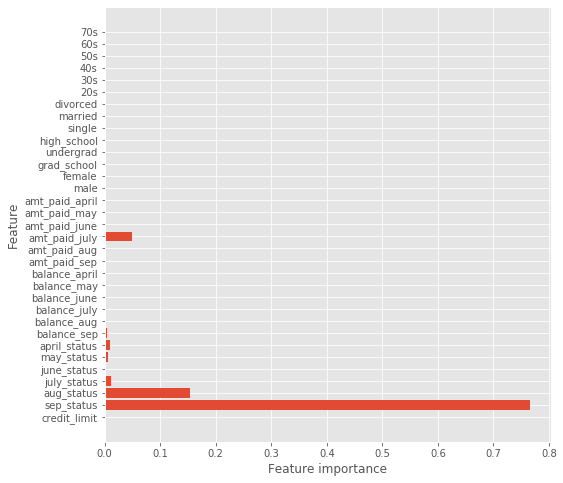

In [89]:
plot_feature_importances(tree_clf2)

In [90]:
# Test set predictions
pred = tree_clf2.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4450  237]
 [ 836  477]]
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4687
         1.0       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



f1-score of 0.47 --> Lower than the non-grid-searched Decision Tree made above. 

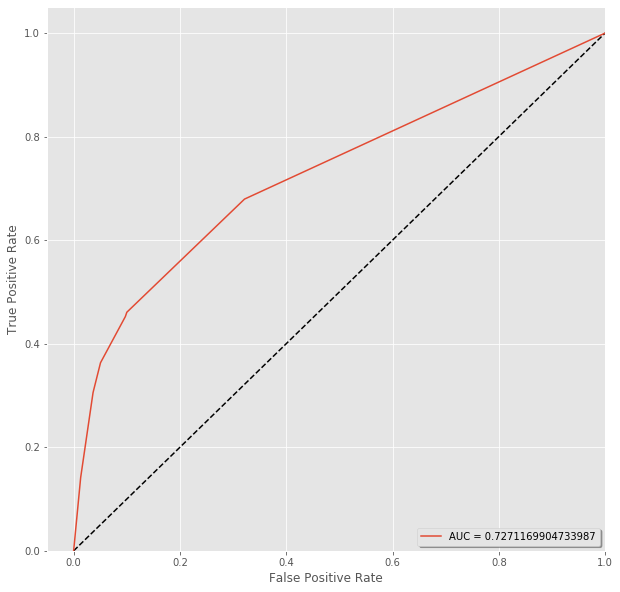

In [91]:
# overall accuracy
acc = tree_clf2.score(X_test,y_test)

# get roc/auc info
y_score = tree_clf2.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

### Notes on Grid-Search-Optimized Decision Tree:
- AUC: 0.7271
- Precision: 0.67
- Recall: 0.36
- F1: 0.47

## Grid Search with your RF:

In [92]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Val Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Val Score for Random Forest Classifier: 81.38%


In [93]:
# 81.38% is our baseline after using cross-validation (Almost exactly what we got from our foray into Random Forests above)

In [94]:
rf_param_grid = {
    'n_estimators' : [10,30,100],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 2,6,10],
    'min_samples_split' : [5,10],
    'min_samples_leaf' : [3,6]
    
}

In [95]:
# rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
# rf_grid_search.fit(X_train, y_train)


# print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
# print("")
# print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 81.93%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 100}


Our accuracy has been boosted by about 0.43%.

## Between Decision Trees and Random Forest, which performs best on the holdout set?

In [97]:
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)

Decision tree grid search:  0.8211666666666667
Random forest grid search:  0.8195


Decision Tree outperforms RF by 0.0011. I still put my weight behind Random Forest because of its complexity. Let's find its f1-score.

## Let's use our optimal parameters to create a Random Forest and a *Final Analysis of Important Features*

In [96]:
forest3 = RandomForestClassifier(n_estimators=100, max_depth=None, 
                                criterion = 'gini', min_samples_leaf=6,
                                min_samples_split=10)
forest3.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=6, min_samples_split=10)

In [98]:
# Training accuracy score
forest3.score(X_train, y_train)

0.86825

In [99]:
# Test accuracy score
forest3.score(X_test, y_test)

0.8203333333333334

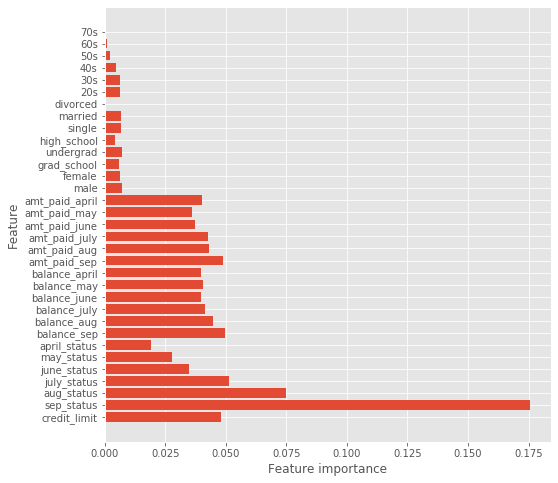

In [100]:
plot_feature_importances(forest3)

## Interpretation of Optimized Random Forest Results

- Status of Payment from September is still paramount
    - However now instead of being in the range of above 0.25 it is now close to 0.12
    - The amount one pays each month and the balance have increased in importance, however status of payment in August & September are still the best predictors.
    - Most notable third place: amt_paid_sep

## Check the F1 Score before we finish.

In [101]:
# Test set predictions for final forest:
pred = forest3.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4459  228]
 [ 850  463]]
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4687
         1.0       0.67      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



- F-1 Score of 0.46
- Accuracy of 0.82
- Significantly higher precision than recall.
    - I would rather a higher rate of false positives than false negatives as the stakeholders (bankers) would rather us deny loans than give to people who are likely to default on their next payment. 

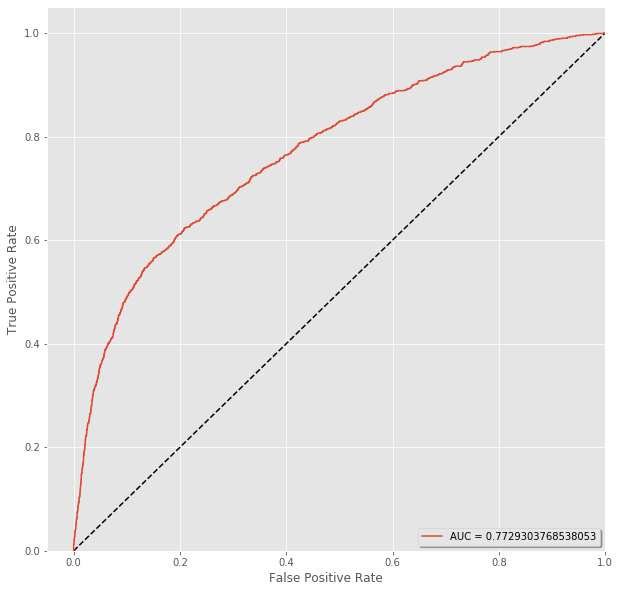

In [102]:
# overall accuracy
acc = forest3.score(X_test,y_test)

# get roc/auc info
y_score = forest3.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

### Final AUC of Optimized Random Forest: 0.773

In [103]:
#fn = X_train.columns
#cn = 'default payment next month'
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,4), dpi=800)
#tree.plot_tree(forest.estimators_[3],
#               feature_names = fn, 
#               class_names=cn,
#               filled = True);
#fig.savefig('rf_individualtree.png')

In [104]:
#fn = X_train.columns
#cn = 'default payment next month'
#fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (30,8), dpi=900)
#for index in range(0, 5):
#    tree.plot_tree(forest.estimators_[index],
#                   feature_names = fn, 
#                   class_names=cn,
#                   filled = True,
#                   ax = axes[index]);

#    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
#fig.savefig('rf_5trees.png')

# Analysis focusing on Important Features

## Let's perform an analysis where we only focus on the top 10 most important features  and run a few models to see if we can find any further information.

### According to the Feature Importance chart given by the most recent Random Forests model:
- I picked the status, balance, and amount paid for the last three months plus the credit limit

In [105]:
X = df[['credit_limit','sep_status','aug_status', 'july_status','balance_sep','balance_aug','balance_july','amt_paid_sep','amt_paid_aug','amt_paid_july']]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

First, an untuned Decision Tree & Random Forest and then ones tuned based on GridSearch and our Data

In [107]:
dt4 = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [108]:
# Make predictions using test set 
y_pred = dt4.predict(X_test)

# Check the AUC of predictions
print(metrics.roc_auc_score(y_test, y_pred))

0.6077889435396086


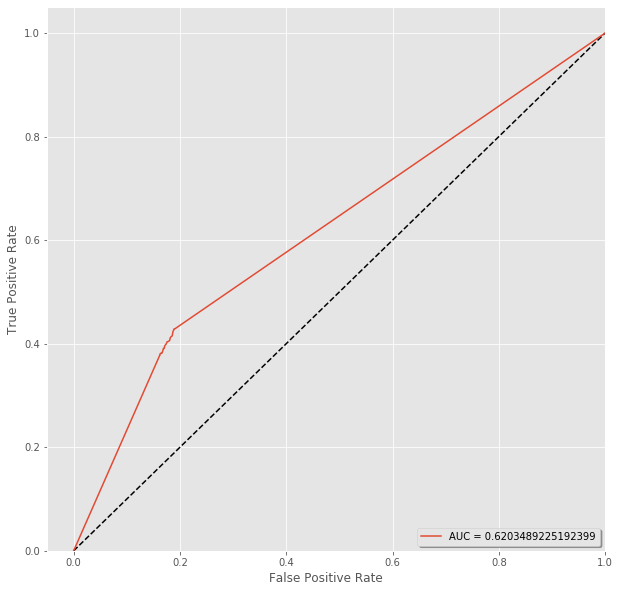

In [109]:
# overall accuracy
acc = dt4.score(X_test,y_test)

# get roc/auc info
y_score = dt4.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [110]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3909  778]
 [ 812  501]]
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      4687
         1.0       0.39      0.38      0.39      1313

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000



### Untuned Decision Tree with Important Features:
- f1 = 0.39
- recall & precision are both low (around 0.39)
- AUC = 0.620

In [ ]:
# Not high enough f1, r, or p to look at feat. importance

## Now for some bagging:

In [111]:
# Instantiate a BaggingClassifier
bagged_tree2 = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5), 
                                 n_estimators=20)

In [112]:
# Fit to the training data
bagged_tree2.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  n_estimators=20)

In [113]:
# Training accuracy score
bagged_tree2.score(X_train, y_train)

0.8244166666666667

In [114]:
# Test accuracy score
bagged_tree2.score(X_test, y_test)

0.8218333333333333

In [115]:
# Test set predictions
pred = bagged_tree2.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4494  193]
 [ 876  437]]
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89      4687
         1.0       0.69      0.33      0.45      1313

    accuracy                           0.82      6000
   macro avg       0.77      0.65      0.67      6000
weighted avg       0.81      0.82      0.80      6000



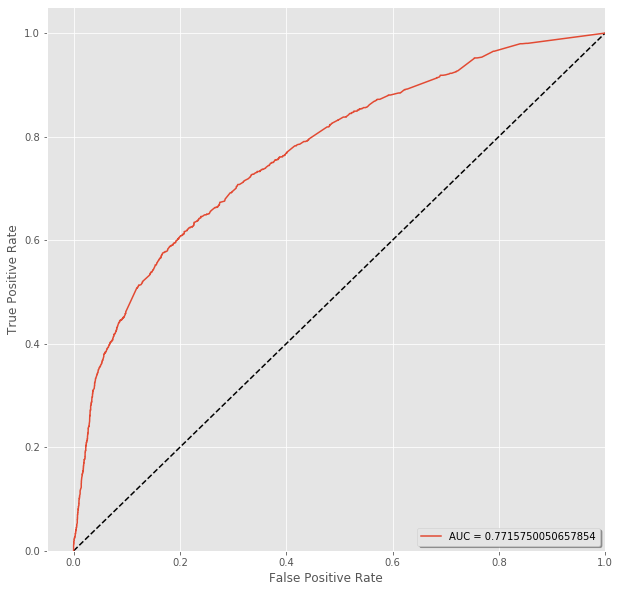

In [116]:
# overall accuracy
acc = bagged_tree2.score(X_test,y_test)

# get roc/auc info
y_score = bagged_tree2.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

### Bagging with Important Features:
- F1: 0.45 
- Precision increased to 0.69. Recall decreased to 0.33
- AUC: 0.771

## Untuned Random Forest with Important Features

In [119]:
# Instantiate and fit a RandomForestClassifier
forest4 = RandomForestClassifier(n_estimators=100, max_depth=6)
forest4.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [120]:
# Training accuracy score
forest4.score(X_train, y_train)

0.8275416666666666

In [121]:
# Testing Accuracy
forest4.score(X_test, y_test)

0.8203333333333334

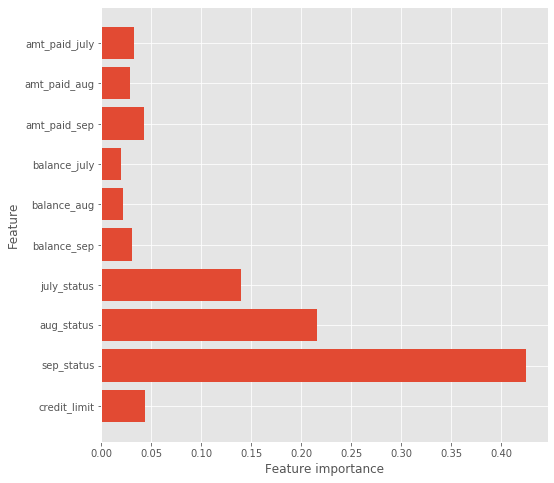

In [122]:
plot_feature_importances(forest4)

In [123]:
# Test set predictions
pred = forest4.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4472  215]
 [ 863  450]]
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4687
         1.0       0.68      0.34      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



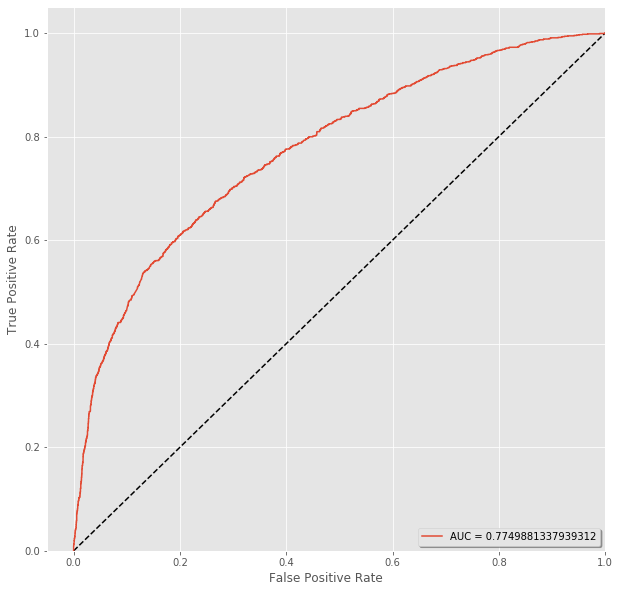

In [124]:
# overall accuracy
acc = forest4.score(X_test,y_test)

# get roc/auc info
y_score = forest4.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

### Untuned Random Forest Scores:
- F1: 0.45
- Precision: 0.68
- Recall: 0.34
- AUC: 0.774

## GridSearch Decision Tree with Important Features

In [ ]:
#dt_clf2 = DecisionTreeClassifier()
#dt_cv_score = cross_val_score(dt_clf2, X_train, y_train, cv=3) 
#mean_dt_cv_score = np.mean(dt_cv_score)

#print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

In [ ]:
#dt_param_grid = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [None, 2, 3, 4, 5, 6],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [ ]:
# Instantiate GridSearchCV
#dt_grid_search = GridSearchCV(dt_clf2, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
#dt_grid_search.fit(X_train, y_train)

In [ ]:
# Mean training score
#dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
#dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

#print(f"Mean Training Score: {dt_gs_training_score :.2%}")
#print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
#print("Best Parameter Combination Found During Grid Search:")
#dt_grid_search.best_params_

In [125]:
tree_clf3 = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf = 1,
                                  min_samples_split = 2)
tree_clf3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

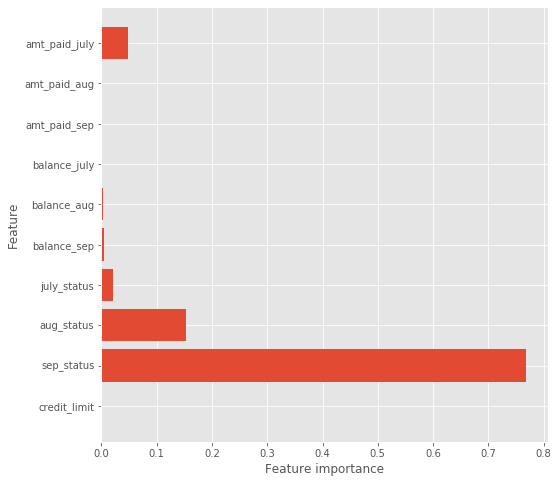

In [126]:
plot_feature_importances(tree_clf3)

In [127]:
# Test set predictions for tree:
pred = tree_clf3.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4511  176]
 [ 906  407]]
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      4687
         1.0       0.70      0.31      0.43      1313

    accuracy                           0.82      6000
   macro avg       0.77      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



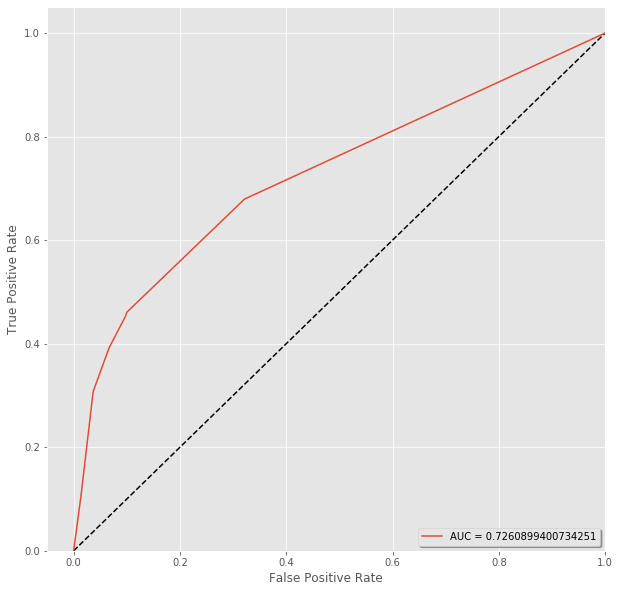

In [128]:
# overall accuracy
acc = tree_clf3.score(X_test,y_test)

# get roc/auc info
y_score = tree_clf3.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

### Final Data Readout of Hypertuned Decision Tree with Important Features:
- F1: 0.43
- Precision: 0.70
- Recall: 0.31
- AUC: 0.726

In [129]:
# Create DOT data
#dot_data = export_graphviz(tree_clf3, out_file=None, 
#                           feature_names=X_train.columns,  
#                           class_names=np.unique(y).astype('str'), 
#                           filled=True, rounded=True, special_characters=True)

# Draw graph
#graph = graph_from_dot_data(dot_data)  

# Show graph
#Image(graph.create_png())

## GridSearch Random Forest with Important Features

In [130]:
forest5 = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(forest5, X_train, y_train, cv=3))

print(f"Mean Cross Val Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Val Score for Random Forest Classifier: 80.88%


In [ ]:
# This 80.85% is our baseline

In [ ]:
#rf_param_grid = {
#    'n_estimators' : [10,30,100],
#    'criterion' : ['gini', 'entropy'],
#    'max_depth' : [None, 2,6,10],
#    'min_samples_split' : [5,10],
#    'min_samples_leaf' : [3,6]
    
}

In [ ]:
#rf_grid_search = GridSearchCV(forest5, rf_param_grid, cv=3)
#rf_grid_search.fit(X_train, y_train)


#print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
#print("")
#print(f"Optimal Parameters: {rf_grid_search.best_params_}")

In [131]:
forest5 = RandomForestClassifier(n_estimators=10, max_depth=6, 
                                criterion = 'gini', min_samples_leaf=6,
                                min_samples_split=5)
forest5.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=10)

In [132]:
# Training accuracy score
forest5.score(X_train, y_train)

0.8244166666666667

In [133]:
# Testing accuracy score
forest5.score(X_test, y_test)

0.8215

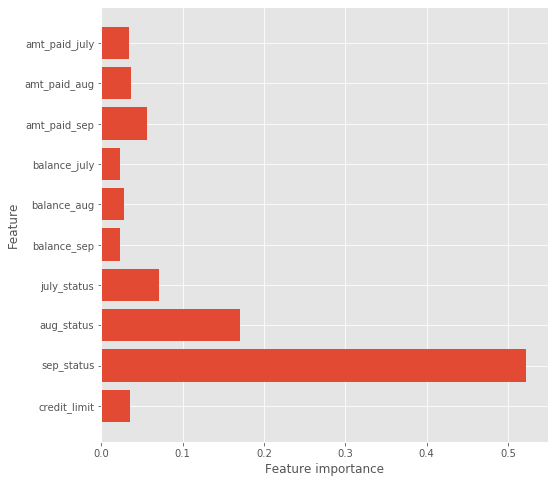

In [134]:
plot_feature_importances(forest5)

In [135]:
# Test set predictions for final forest:
pred = forest5.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4487  200]
 [ 871  442]]
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89      4687
         1.0       0.69      0.34      0.45      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



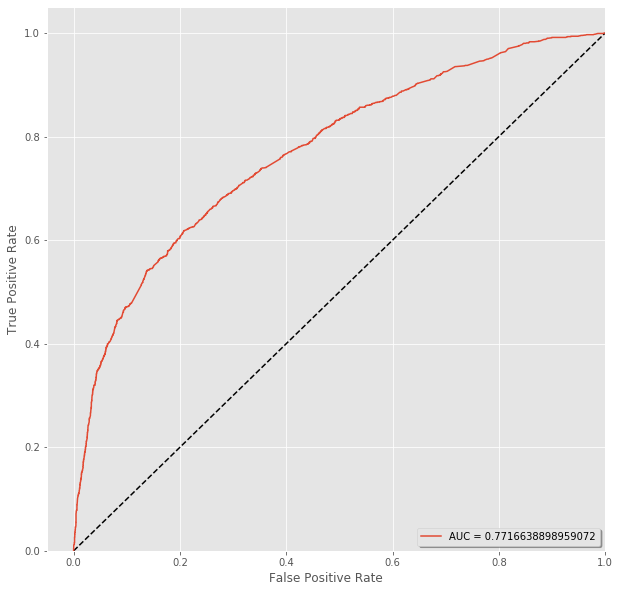

In [136]:
# overall accuracy
acc = forest5.score(X_test,y_test)

# get roc/auc info
y_score = forest5.predict_proba(X_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

### Final Data Readout of Hypertuned Random Forest with Important Features:

- F1:0.44
- Precision: 0.68
- Recall: 0.33
- AUC: 0.772

In [ ]:
#fn = X_train.columns
#cn = 'default payment next month'
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,4), dpi=800)
#tree.plot_tree(forest.estimators_[3],
#               feature_names = fn, 
#               class_names=cn,
#               filled = True);
#fig.savefig('rf_individualtree.png')

In [ ]:
#fn = X_train.columns
#cn = 'default payment next month'
#fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (30,8), dpi=900)
#for index in range(0, 5):
#    tree.plot_tree(forest.estimators_[index],
#                   feature_names = fn, 
#                   class_names=cn,
#                   filled = True,
#                   ax = axes[index]);

#    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
#fig.savefig('rf_5trees.png')

# Relevant Data from Each Model

## Logistic Regression 
- F1: 0.41
- Precision: 0.3
- Recall: 0.62
- AUC: 0.656
- Accuracy: 78% 

## KNN Untuned
- F1: 0.42
- Precision: 0.55
- Recall: 0.34
- AUC: 0.491
- Accuracy: 80%

## KNN With Best K
- F1: 0.42
- Precision: 0.55
- Recall: 0.34
- AUC: N/A
- Accuracy: 80%

## Decision Tree #1 (Untuned)
- F1: 0.39
- Precision: 0.38
- Recall: 0.40
- AUC: 0.609
- Accuracy: 72%

## Decision Tree #2 (Max Depth: 6)
- F1: 0.47
- Precision: 0.67
- Recall: 0.36
- AUC: 0.756
- Accuracy: 82%

## Decision Tree #3 (Manually Tuned)
- F1: 0.51
- Precision: 0.5
- Recall: 0.52
- AUC: 0.733
- Accuracy: 78%

## Decision Tree #4 (Grid-Searched)
- F1: 0.47
- Precision: 0.67
- Recall: 0.36
- AUC: 0.727
- Accuracy: 82%

## Decision Tree #5 (Untuned with Top Ten Features)
- F1: 0.39
- Precision: 0.39
- Recall: 0.39
- AUC: 0.620
- Accuracy: 73%

## Decision Tree #6 (Grid-Searched with Top Ten Features)
- F1:0.43
- Precision: 0.68
- Recall: 0.39
- AUC: 0.775
- Accuracy: 82%

## Bagging #1 (Original Dataset)
- F1: 0.42
- Precision: 0.68
- Recall: 0.31
- AUC: 0.771
- Accuracy: 82%

## Bagging #2 (Top Ten Features)
- F1: 0.45
- Precision: 0.69
- Recall: 0.33
- AUC: 0.771
- Accuracy: 82%

## Random Forests #1 (Untuned, Original Dataset)
- F1: 0.42
- Precision: 0.68
- Recall: 0.31
- AUC: 0.772
- Accuracy: 82%

## Random Forests #2 (Grid-Searched, Original Dataset)
- F1: 0.46
- Precision: 0.67
- Recall: 0.35
- AUC: 0.773
- Accuracy: 82%

## Random Forests #3 (Untuned, Top Ten Features)
- F1: 0.46
- Precision: 0.68
- Recall: 0.34
- AUC: 0.775
- Accuracy: 82%

## Random Forests #4 (Grid-Searched, Top Ten Features)
- F1 = 0.45
- Precision: 0.69
- Recall: 0.34
- AUC: 0.772
- Accuracy: 82%

# Conclusion:

- A manually tuned Decision Tree from the original dataset gave us the best results in terms of F1
    - Pros for a single decision tree: 
        - Less computationally complex than a random forest
        - This model, in particular, is tuned to what seems to be maximum performance given the dataset. 
            - F1 at 0.51 means that there is moderate harmony between the precision and the recall. This means that a moderate amount of results are returned with a moderate amount of those results labeled correctly. 
- Since we are pitching our model to bankers & loan officers, however, it seems that leaning towards a higher recall and a lower precision may be appropriate.
    - In this case, our best model would be the logistic regression model. 
        - This model's high recall and low precision means that there our model will predict more people will default on their loans than exist in reality. The lower precision means our model may not be very accurate per person however, in the long run, more false positives could save a bank/lender money than more false negatives.
- After speaking with a banker friend, he said that in the interest of ethics as well as with advancements in tech, high precision can be very valuable as well.
    - While a higher recall can save the bank money, it can also turn away valuable business partners and, with a high enough recall and a low enough precision, your bank can gain a reputation for not having a solid predictive model and you will lose business.
        - I used to experience this myself when my bank would too often categorize charges I would make abroad as fraudulent even though I told my bank exactly where I would be. 
    - In the case that a bank would want a model with a higher precision, I would recommend using **The grid-searched decision tree or random forest**
        - Both models perform similarly however it will depend on how much computational complexity one could handle.
            - If one is looking for a more complex and robust model, GridSearch Random Forest is the way to go.
- Finally, regarding features to focus on:
    - The payment status within the last 2-3 months seems, by far, to be the most likely to predict whether or not one will default on their credit payment next month.